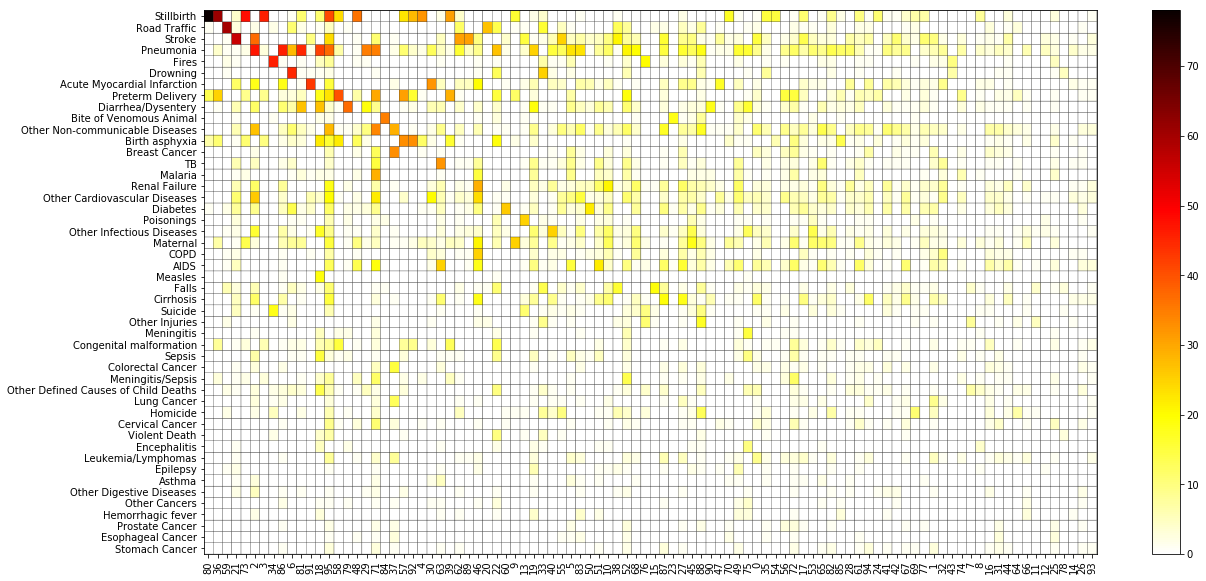

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_base = pd.read_csv("clusters.csv")

lista_enfermedades = df_base["gs_text34"].unique()
lista_clusters = df_base["cluster"].unique()

df = pd.DataFrame(index=lista_enfermedades, columns=lista_clusters)
df = df.fillna(0) # rellena el dataframe con ceros

# rellena el dataframe con valores reales
for cluster in lista_clusters:
    df_cluster_actual = df_base[df_base["cluster"] == cluster]  # filtrar el df por el cluster actual
    pares = df_cluster_actual["gs_text34"].value_counts()  # {enfermedad: numero_de_casos, ...}
    for enf, times in pares.iteritems():
        df.at[enf, cluster] = times # rellena la columna del cluster correspondiente

# poner arriba las filas que tengan la enfermedad con el valor más alto 
a = dict(df.max(axis=1))
sorted_by_value = sorted(a.items(), key=lambda kv: kv[1])
sorted_index = [item[0] for item in sorted_by_value]
df = df.reindex(sorted_index)

# poner a la izquierda las columnas que tengan la enfermedad con el valor más alto
b = dict(df.max())
sorted_by_value = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
sorted_columns = [item[0] for item in sorted_by_value]
df = df.reindex(columns=sorted_columns)

# dibuja el gráfico
plt.figure(figsize=(20,10))
plt.pcolor(df, cmap='hot_r', edgecolor='k')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
plt.colorbar()
plt.show()